Test

(8.730499333333333, 46.04412677777778)


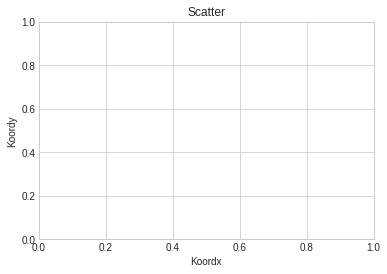

In [1]:
#!/usr/bin/python3
# coding=utf-8

#api3.geo.admin.ch

# Schweizer Koordinaten Bezugsystem = (LV95 CH1903+ / LV95 EPSG 2056)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# Ganz wichtig, sonst wird der Plot nicht agezeigt
%matplotlib inline


"""

large = 22; med = 16; small = 12

params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

"""



plant_data = pd.read_csv("MAR infoflora_200274_Pilatus.csv",sep=";", encoding="iso-8859-1", usecols=['Koordx', 'Koordy', 'Trivialname', 'Jahr'])
df = pd.DataFrame(plant_data)
#print((df[df['Trivialname'] == 'Felsenmispel']))


x1 = []
y1 = []
x1 = df['Koordx'].to_list()
y1 = df['Koordy'].to_list()
name = df['Trivialname'].to_list()

plt.style.use('seaborn-whitegrid')
plt.xlabel('Koordx')
plt.ylabel('Koordy')
plt.title('Scatter')



#Write a function which gets all plants where name = 

#plt.show()

def convert_to_WGS84(E, N):
	#  Nährungsformel für die Umrechnung von Schweizer Projektionskoordinaten in ellipsoidische WGS84 Koordinaten
	#  online converter admin.ch: https://www.swisstopo.admin.ch/en/maps-data-online/calculation-services/navref.html
	#  formula from https://www.google.ch/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjI44q72J_qAhVKxYUKHR8CAYYQFjAAegQIBhAB&url=https%3A%2F%2Fwww.swisstopo.admin.ch%2Fcontent%2Fswisstopo-internet%2Fde%2Fonline%2Fcalculation-services%2F_jcr_content%2FcontentPar%2Ftabs%2Fitems%2Fdokumente_und_publik%2FtabPar%2Fdownloadlist%2FdownloadItems%2F8_1467103085694.download%2Frefsys_d.pdf&usg=AOvVaw0JImHVi39dw5-Rs5KuN-KM
	

	y_strich = (E - 2600000)/1000000
	x_strich = (N - 1200000)/1000000
	

	lambda_strich = 2.6779094 + 4.728982 * y_strich + 0.791484 * y_strich *x_strich + 0.1306 * y_strich * x_strich**2 - 0.0436 * y_strich**3
	phi_strich = 16.9023892 + 3.238272 * x_strich -0.270978 * y_strich**2 - 0.002528 * x_strich**2 - 0.0447 * y_strich**2 * x_strich - 0.0140 * x_strich**3

	#Umrechnung der Länge und Breite in Einheit [°]

	lambda_neu = lambda_strich * 100 / 36 
	phi_neu = phi_strich * 100 / 36

	return (lambda_neu, phi_neu)

print(convert_to_WGS84(2700000,1100000))